In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Read the .csv file
df = pd.read_csv("HW2_training.csv")

# Explaratory Data Analysis

In [3]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,CASH_OUT,94865.94,41338.00,0.00,0.00,94865.94,0
1,CASH_IN,318248.86,2980.00,321228.86,336116.40,17867.54,0
2,PAYMENT,17546.87,0.00,0.00,0.00,0.00,0
3,CASH_OUT,126683.04,11162.85,0.00,2519453.70,2646136.74,0
4,CASH_OUT,150054.00,356.00,0.00,0.00,150054.00,0
...,...,...,...,...,...,...,...
628966,PAYMENT,23295.72,7234.00,0.00,0.00,0.00,0
628967,CASH_OUT,274781.27,126263.81,0.00,603764.98,878546.26,0
628968,PAYMENT,9874.46,217132.07,207257.61,0.00,0.00,0
628969,PAYMENT,11457.28,0.00,0.00,0.00,0.00,0


In [4]:
df.shape

(628971, 7)

In [5]:
# There is one categorical column 'type', rest of the columns are numerical
# And target colunm is integer..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628971 entries, 0 to 628970
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            628971 non-null  object 
 1   amount          628971 non-null  float64
 2   oldbalanceOrg   628971 non-null  float64
 3   newbalanceOrig  628971 non-null  float64
 4   oldbalanceDest  628971 non-null  float64
 5   newbalanceDest  628971 non-null  float64
 6   isFraud         628971 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.6+ MB


In [6]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.289710e+05,6.289710e+05,6.289710e+05,6.289710e+05,6.289710e+05,628971.000000
mean,1.588842e+05,8.741938e+05,8.936291e+05,9.770030e+05,1.113246e+06,0.001450
std,2.669073e+05,2.979031e+06,3.015351e+06,2.293012e+06,2.413572e+06,0.038051
min,2.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.213569e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,7.648334e+04,1.601244e+04,0.000000e+00,1.267461e+05,2.184725e+05,0.000000
75%,2.136965e+05,1.358090e+05,1.737266e+05,9.147774e+05,1.149067e+06,0.000000
max,1.000000e+07,3.840000e+07,3.860000e+07,4.140000e+07,4.210000e+07,1.000000


In [7]:
# There are no null values
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# Distinct values in 'type' column
df["type"].value_counts(normalize=True)

type
CASH_OUT    0.357147
PAYMENT     0.337127
CASH_IN     0.216298
TRANSFER    0.082632
DEBIT       0.006797
Name: proportion, dtype: float64

In [9]:
# Fraud(1) and non fraud(0) count
df["isFraud"].value_counts()

isFraud
0    628059
1       912
Name: count, dtype: int64

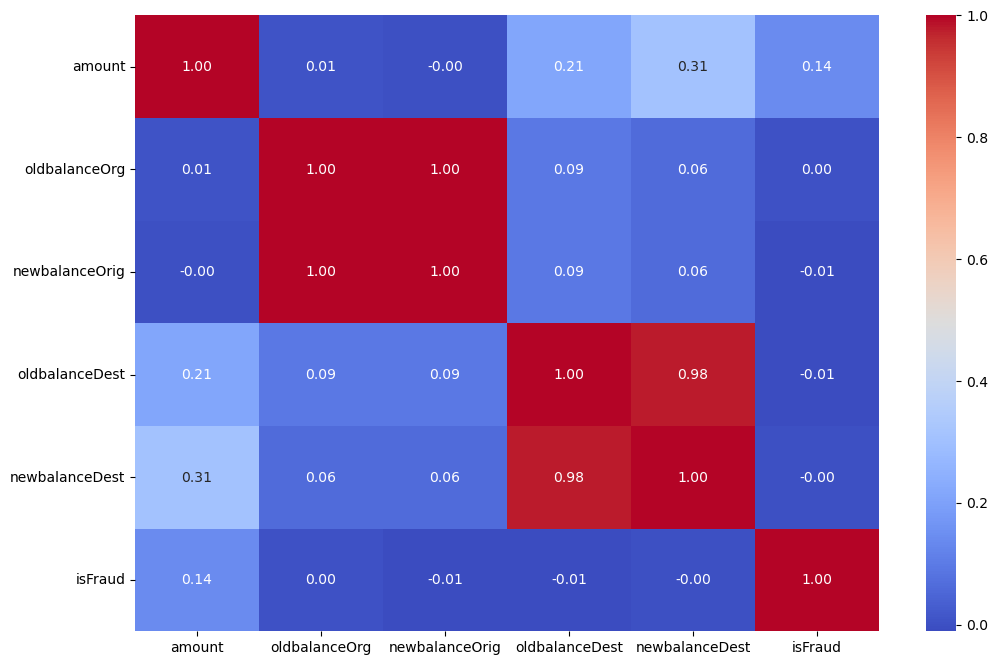

In [10]:
# I wanted to create a correlation graph to see how corelated the columns are with eachother.
corr = df.corr(numeric_only = True)

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



In [11]:
# My findings:
# Besides the obv correlation when the columns are compared with eachother, 
# there is also a strong correlation between the oldbalanceOrg and newbalanceOrig and oldbalanceDest and newbalanceDest. 
# To avoid overfitting or instability in the model, I decided to remove one of each highley corelated feature. 
# Therefore, I will be removing the oldbalanceOrg and the oldbalanceDest.

In [12]:
df.drop(columns=["oldbalanceOrg","oldbalanceDest"],inplace=True)

In [13]:
#New DataFrame
df

,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,CASH_OUT,94865.94,0.00,94865.94,0
1,CASH_IN,318248.86,321228.86,17867.54,0
2,PAYMENT,17546.87,0.00,0.00,0
3,CASH_OUT,126683.04,0.00,2646136.74,0
4,CASH_OUT,150054.00,0.00,150054.00,0
...,...,...,...,...,...
628966,PAYMENT,23295.72,0.00,0.00,0
628967,CASH_OUT,274781.27,0.00,878546.26,0
628968,PAYMENT,9874.46,207257.61,0.00,0
628969,PAYMENT,11457.28,0.00,0.00,0


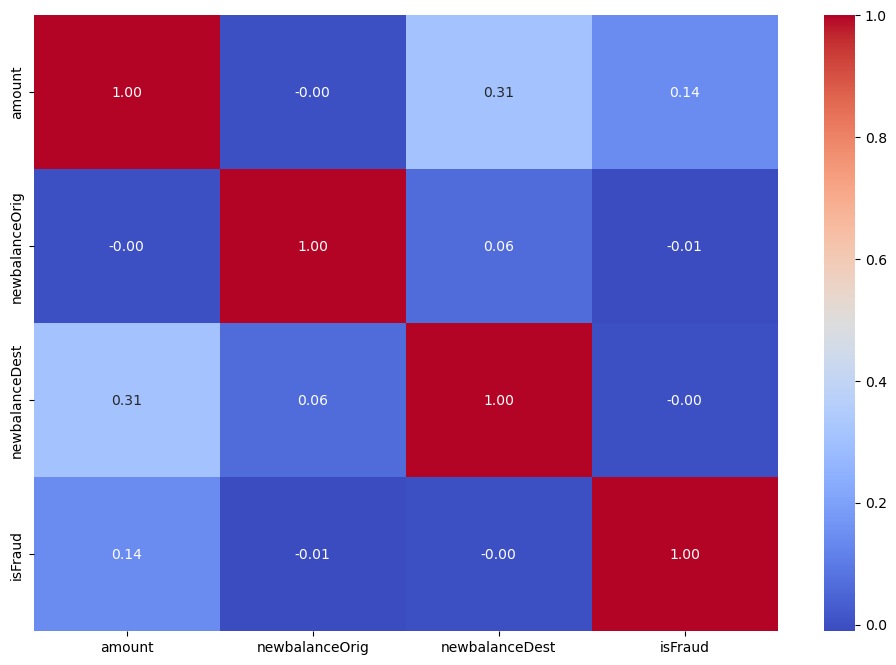

In [14]:
# New Correlation graph
corr = df.corr(numeric_only = True)

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [15]:
# The 'type' column is a categorical column that consists of stirngs. In order for the model to understand
# the contents, I have to change the data into integers that resemble each distinct value. To do this I will be using
# One hot encoding. 

In [16]:
# My one hot encoding function that I will be reusing for the HW2 test.
def make_one_hot(df):
    one_hot_encoded = pd.get_dummies(df['type'],dtype=int)
    
    #concatenate the encoded columns with the original DataFrame and dorp "type" column
    df_encoded = pd.concat([df, one_hot_encoded], axis =1)
    df_encoded.drop('type', axis =1, inplace=True)
    
    return df_encoded
df_encoded = make_one_hot(df)

In [17]:
df_encoded

,amount,newbalanceOrig,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,94865.94,0.00,94865.94,0,0,1,0,0,0
1,318248.86,321228.86,17867.54,0,1,0,0,0,0
2,17546.87,0.00,0.00,0,0,0,0,1,0
3,126683.04,0.00,2646136.74,0,0,1,0,0,0
4,150054.00,0.00,150054.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
628966,23295.72,0.00,0.00,0,0,0,0,1,0
628967,274781.27,0.00,878546.26,0,0,1,0,0,0
628968,9874.46,207257.61,0.00,0,0,0,0,1,0
628969,11457.28,0.00,0.00,0,0,0,0,1,0


In [19]:
# Have X columns and y column for training
X = df_encoded.drop(columns= ['isFraud'])
y = df_encoded['isFraud']

In [20]:
# Table does not have 'isFraud' which is our y column.
X

,amount,newbalanceOrig,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,94865.94,0.00,94865.94,0,1,0,0,0
1,318248.86,321228.86,17867.54,1,0,0,0,0
2,17546.87,0.00,0.00,0,0,0,1,0
3,126683.04,0.00,2646136.74,0,1,0,0,0
4,150054.00,0.00,150054.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...
628966,23295.72,0.00,0.00,0,0,0,1,0
628967,274781.27,0.00,878546.26,0,1,0,0,0
628968,9874.46,207257.61,0.00,0,0,0,1,0
628969,11457.28,0.00,0.00,0,0,0,1,0


In [21]:
# Only contains y value which is isFraud.
y

0         0
1         0
2         0
3         0
4         0
         ..
628966    0
628967    0
628968    0
628969    0
628970    0
Name: isFraud, Length: 628971, dtype: int64

In [24]:
# Create the tests for this data 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X.shape,X_train.shape,X_test.shape

((628971, 8), (503176, 8), (125795, 8))

# Training

In [ ]:
# For the training process after getting my results for logisitc regression model and seeing the poor F1 score, 
# I ended up using all three models mentioned in the rubric to see which one yields 
# the best results. The three models were Logistic regression, Decision trees, and K-NN. 

## Training Logistic regression model 

In [52]:
# Initializing the logistic regression model and training it
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Use the model to find how many of the amount of predicted fraud in the X_test from the data.
y_pred = logistic_reg.predict(X_test)

In [29]:
# Function to find the accuracy and F1 Score by comparing the predicted y values with the actual y values
def acc_report(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    class_report= classification_report(actual,predicted)
    print('the accuracy of the model is', acc_score)
    print(class_report)

In [30]:
# Results
acc_report(y_test,y_pred)

the accuracy of the model is 0.9984975555467228
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125586
           1       0.95      0.10      0.18       209

    accuracy                           1.00    125795
   macro avg       0.98      0.55      0.59    125795
weighted avg       1.00      1.00      1.00    125795



In [31]:
# Created a confusion matrix
confusion_matrix(y_test,y_pred)

array([[125585,      1],
       [   188,     21]])

In [32]:
# TOTAL ROWS 125795
# There are 209 fraud value =1
# array([[125585(TN),      1(FP)],
#        [   188(FN),   21(TP)]])

In [ ]:
# Findings:
# Logistic Regression model results: 0.18 F1 score on positive values (frauds) which means that the model was only able
# to find 21 out of the 209 frauds. This result is not good. 

# Decision trees

In [38]:
# Initializing the Decision Tree Classifier and training it
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Use the model to find how many of the amount of predicted fraud in the X_test from the data.
y_pred_clf = clf.predict(X_test)

In [40]:
# Results
acc_report(y_test,y_pred_clf)

the accuracy of the model is 0.9982352239755157
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125586
           1       0.47      0.44      0.45       209

    accuracy                           1.00    125795
   macro avg       0.73      0.72      0.72    125795
weighted avg       1.00      1.00      1.00    125795



In [53]:
# Created a confusion matrix
confusion_matrix(y_test,y_pred_clf)

array([[125482,    104],
       [   118,     91]])

In [54]:
# Findings:
# Decision tree gave better result than logistic regression. 
# It has 0.45 F1 score on positive values meaning that the model was able to correctly
# find 91 frauds out of the 209 frauds in the test data.

# K-NN Algorithm


In [114]:
# I tried different hyper parameters for n_neighbors and any number higher than 5 gave lower F1 results for positives.
knn = KNeighborsClassifier(n_neighbors=3)

In [123]:
# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

In [116]:
# Results
acc_report(y_test,y_pred_knn)

the accuracy of the model is 0.9984260105727573
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125586
           1       0.59      0.17      0.27       209

    accuracy                           1.00    125795
   macro avg       0.79      0.59      0.63    125795
weighted avg       1.00      1.00      1.00    125795



In [104]:
# Created a confusion matrix
confusion_matrix(y_test,y_pred_knn)

array([[125586,      0],
       [   209,      0]])

In [92]:
# Findings:
# The K-NN Algorithm gave better results than logistic regression however it gave worse results than the 
# decision tree. 
# It has 0.27 F1 score on positive values meaning that the model was able to correctly
# find 36 frauds out of the 209 frauds in the test data.

# Conclusion

In [61]:
# I decided to use Decision trees algorithm for final inference because it had the highest F1 score

In [62]:
df_inference = pd.read_csv("HW2_test_input.csv")

In [63]:
df_inference

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,CASH_OUT,119240.82,0.00,0.00,188216.08,296238.92
1,PAYMENT,2799.78,48932.00,46132.22,0.00,0.00
2,CASH_OUT,134843.00,21278.00,0.00,0.00,134843.00
3,TRANSFER,631622.55,0.00,0.00,2708960.94,3793415.70
4,CASH_OUT,135241.51,0.00,0.00,2448960.30,2584201.81
...,...,...,...,...,...,...
209939,CASH_OUT,51420.99,45283.00,0.00,717858.34,769279.33
209940,CASH_IN,99882.73,2732875.35,2832758.08,1057750.11,957867.38
209941,CASH_IN,42374.82,256.00,42630.82,3755635.14,3713260.33
209942,PAYMENT,20558.23,0.00,0.00,0.00,0.00


In [64]:
#Dropping the 'oldbalanceOrg' and 'oldbalanceDest' columns to avoid overfitting 
df_inference.drop(columns=["oldbalanceOrg","oldbalanceDest"],inplace=True)
df_inference_encoded = make_one_hot(df_inference)

In [65]:
df_inference_encoded

,amount,newbalanceOrig,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,119240.82,0.00,296238.92,0,1,0,0,0
1,2799.78,46132.22,0.00,0,0,0,1,0
2,134843.00,0.00,134843.00,0,1,0,0,0
3,631622.55,0.00,3793415.70,0,0,0,0,1
4,135241.51,0.00,2584201.81,0,1,0,0,0
...,...,...,...,...,...,...,...,...
209939,51420.99,0.00,769279.33,0,1,0,0,0
209940,99882.73,2832758.08,957867.38,1,0,0,0,0
209941,42374.82,42630.82,3713260.33,1,0,0,0,0
209942,20558.23,0.00,0.00,0,0,0,1,0


In [66]:
final_prediction = clf.predict(df_inference_encoded)

In [120]:
final_prediction.shape

(209944,)

In [121]:
final_prediction_results = pd.DataFrame(final_prediction)
final_prediction_results

,0
0,0
1,0
2,0
3,0
4,0
...,...
209939,0
209940,0
209941,0
209942,0


In [122]:
final_prediction_results.to_csv('HW2_test_output.csv', index=False)